# CMSC422 Assignment2
Siyuan Peng : 116243407
Shi Jiunn Teo : 0000000

### WU1

### WU2

### WU3: What is the impact of the step size on convergence? Find values of the step size where the algorithm diverges and converges.
The step size should be at least positive. If it's negative, the model will move to the direction of gradient instead of
the opposite direction of gradient. If step size is too small, model will converge slowly. If the step size is too large, model
will eventully diverge.
## WU4:Plot the function you're trying to minimize and show two runs of gd

In [1]:
import gd
import numpy as np
import matplotlib.pyplot as plt
x, trajectory = gd.gd(lambda x: 0.5*(x**4)-3*(x**2)-2*x+5, lambda x: 2*(x**3)-6*x-2, -2, 20, 0.1)
trajectory

array([5.        , 3.8408    , 3.79472351, 3.78298828, 3.77939548,
       3.77812165, 3.77761632, 3.77739761, 3.77729617, 3.77724641,
       3.77722084, 3.77720717, 3.77719961, 3.77719532, 3.77719281,
       3.77719131, 3.7771904 , 3.77718983, 3.77718947, 3.77718925,
       3.7771891 ])

In [2]:
x, trajectory = gd.gd(lambda x: 0.5*(x**4)-3*(x**2)-2*x+5, lambda x: 2*(x**3)-6*x-2, 1, 20, 0.1)
trajectory

array([ 0.5       , -2.6032    , -3.10621994, -3.11696751, -3.1171967 ,
       -3.1172097 , -3.11721098, -3.11721115, -3.11721118, -3.11721119,
       -3.11721119, -3.11721119, -3.11721119, -3.11721119, -3.11721119,
       -3.11721119, -3.11721119, -3.11721119, -3.11721119, -3.11721119,
       -3.11721119])

#### Plot For None-convex Function

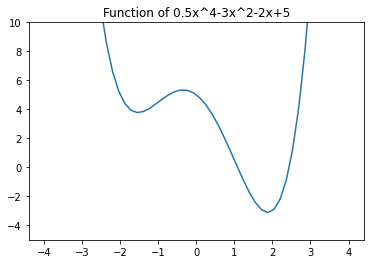

In [3]:
x = np.linspace(-4,4)
y = 0.5*(x**4)-3*(x**2)-2*x+5
plt.plot(x, y)
plt.ylim((-5,10))
plt.title("Function of 0.5x^4-3x^2-2x+5")
plt.savefig('images/wu3-01.jpeg',)

### WU5

In [13]:
import linear, datasets, runClassifier
import numpy as np

#### Classifier with mean squared loss

In [36]:
f = linear.LinearClassifier({'lossFunction': linear.SquaredLoss(), 'lambda': 1, 'numIter': 500, 'stepSize': 0.001})
runClassifier.trainTestSet(f, datasets.WineDataBinary)
weights = np.asarray(f.weights)

Training accuracy 0.995951, test accuracy 0.97786


#### Classifier with logistic loss

In [37]:
f = linear.LinearClassifier({'lossFunction': linear.LogisticLoss(), 'lambda': 1, 'numIter': 500, 'stepSize': 0.0001})
runClassifier.trainTestSet(f, datasets.WineDataBinary)

Training accuracy 0.753036, test accuracy 0.686347


#### Classifier with Hingeloss

In [38]:
f = linear.LinearClassifier({'lossFunction': linear.HingeLoss(), 'lambda': 1, 'numIter': 500, 'stepSize': 0.0005})
runClassifier.trainTestSet(f, datasets.WineDataBinary)

E:\ProgramData\Miniconda3\lib\site-packages\numpy\core\fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Training accuracy 0.753036, test accuracy 0.686347


#### Fine largest/smallest weights and their corresponding words.

In [42]:
len(datasets.WineDataBinary.words)

819

In [43]:
largest_weights_index = weights.argsort()[-5:][::-1]
smallest_weighs_index = weights.argsort()[:5][::-1]

In [44]:
np.asarray(datasets.WineDataBinary.words)[largest_weights_index]

array(['citrus', 'lime', 'crisp', 'tropical', 'acidity'], dtype='<U15')

In [45]:
np.asarray(datasets.WineDataBinary.words)[smallest_weighs_index]


array(['dark', 'currant', 'cherry', 'berry', 'tannins'], dtype='<U15')

The Top five positive is citrus, lime, crisp, tropocal, and acidity and the least five are dark, current, cherry, berry, tannins
The positive words are related to description of Sauvignon-Blanc and the negative words should be describing the taste or the appearance of Cabernet-Sauvignon
